In [1]:
import os, importlib, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# import custom functions
sys.path.insert(0, '../../code/src')
from extract_aqmd_data import get_MDA8_O3

## Plot initial ambient condition

In [2]:
df_ambient_redlands = pd.read_csv('../../data/final/daily_avg_initial_conc_redlands.csv')
df_ambient_redlands['Date'] = pd.to_datetime(df_ambient_redlands['Date'],format='%Y-%m-%d')
df_ambient_redlands.loc[df_ambient_redlands['Date'].dt.weekday < 5, 'Week'] = 'weekday'
df_ambient_redlands.loc[df_ambient_redlands['Date'].dt.weekday >= 5, 'Week'] = 'weekend'
df_ambient_redlands['Month'] = df_ambient_redlands['Date'].dt.month

df_ambient_pasadena = pd.read_csv('../../data/final/daily_avg_initial_conc_pasadena.csv')
df_ambient_pasadena['Date'] = pd.to_datetime(df_ambient_pasadena['Date'],format='%Y-%m-%d')
df_ambient_pasadena.loc[df_ambient_pasadena['Date'].dt.weekday < 5, 'Week'] = 'weekday'
df_ambient_pasadena.loc[df_ambient_pasadena['Date'].dt.weekday >= 5, 'Week'] = 'weekend'
df_ambient_pasadena['Month'] = df_ambient_pasadena['Date'].dt.month

In [3]:
df_chamber_pasadena = pd.read_csv('../../data/final/O3_sensitivity_pasadena.csv')
df_chamber_pasadena['Date'] = pd.to_datetime(df_chamber_pasadena['Date'])
df_chamber_pasadena.loc[df_chamber_pasadena['Date'].dt.weekday < 5, 'Week'] = 'weekday'
df_chamber_pasadena.loc[df_chamber_pasadena['Date'].dt.weekday >= 5, 'Week'] = 'weekend'
df_chamber_pasadena['Month'] = df_chamber_pasadena['Date'].dt.month

df_chamber_redlands = pd.read_csv('../../data/final/O3_sensitivity_redlands.csv')
df_chamber_redlands['Date'] = pd.to_datetime(df_chamber_redlands['Date'])
df_chamber_redlands.loc[df_chamber_redlands['Date'].dt.weekday < 5, 'Week'] = 'weekday'
df_chamber_redlands.loc[df_chamber_redlands['Date'].dt.weekday >= 5, 'Week'] = 'weekend'
df_chamber_redlands['Month'] = df_chamber_redlands['Date'].dt.month

## O3 sensitivity as a function of temperature

In [4]:
df_temp_redlands = pd.read_csv('../../data/final/temp_morning_daily_avg_redlands.csv')
df_temp_pasadena = pd.read_csv('../../data/final/temp_morning_daily_avg_pasadena.csv')
df_temp_redlands['Date'] = pd.to_datetime(df_temp_redlands['Date'])
df_temp_pasadena['Date'] = pd.to_datetime(df_temp_pasadena['Date'])

#### Pasadena

Text(0, 0.5, '$\\Delta\\ O_3^{+NO_x}$ (ppbv)')

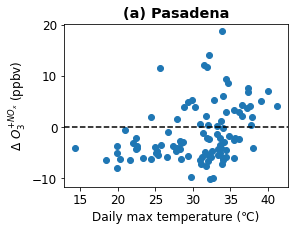

In [9]:
df_temp = pd.read_csv('../../data/raw/AQMD/TEMP_PICKDATA_2021-12-31_PA.csv')
df_temp = df_temp[df_temp['start_hour'].notna()]
df_temp = df_temp[['date','start_hour','value']]
df_temp_max_PA = df_temp.groupby('date').max().reset_index()
df_temp_max_PA['Date'] = pd.to_datetime(df_temp_max_PA['date'])
df_plot = df_chamber_redlands.merge(df_temp_max_PA, on='Date', how='left')

plt.rcParams.update({'font.size': 12})
fig, ax=plt.subplots(figsize=(4,3))
ax.scatter((df_plot['value']-32)*5/9, df_plot['b1_b2_3hr'])
ax.axhline(y=0, color='k', linestyle='--')
ax.set_title('(a) Pasadena', fontweight='bold')
ax.set_xlabel('Daily max temperature (℃)')
ax.set_ylabel(r'$\Delta\ O_3^{+NO_x}$ (ppbv)')

#plt.savefig('../../result/scatter_O3-sensitivity_vs_temperature_pasadena.png', dpi=1200, bbox_inches='tight')

#### Redlands

Text(0, 0.5, '$\\Delta\\ O_3^{+NO_x}$ (ppbv)')

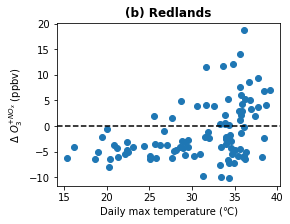

In [8]:
df_temp = pd.read_csv('../../data/raw/AQMD/TEMP_PICKDATA_2021-12-31_RL.csv')
df_temp = df_temp[df_temp['start_hour'].notna()]
df_temp = df_temp[['date','start_hour','value']]
df_temp_max_RL = df_temp.groupby('date').max().reset_index()
df_temp_max_RL['Date'] = pd.to_datetime(df_temp_max_RL['date'])
df_plot = df_chamber_redlands.merge(df_temp_max_RL, on='Date', how='left')

fig, ax=plt.subplots(figsize=(4,3))
ax.scatter((df_plot['value']-32)*5/9, df_plot['b1_b2_3hr'])
ax.axhline(y=0, color='k', linestyle='--')
ax.set_title('(b) Redlands', fontweight='bold')
ax.set_xlabel('Daily max temperature (℃)')
ax.set_ylabel(r'$\Delta\ O_3^{+NO_x}$ (ppbv)')

#plt.savefig('../../result/scatter_O3-sensitivity_vs_temperature_redlands.png', dpi=1200, bbox_inches='tight')

## Inital NOx and final O3

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_1320/2089911971.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


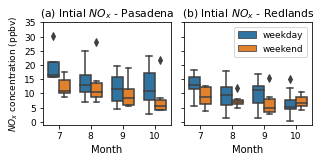

In [8]:
plt.rcParams.update({'font.size': 9})
fig, ax=plt.subplots(1,2, figsize=(4.5,2.2), sharey=True)

my_hue_order = ['weekday', 'weekend']
sns.boxplot(x='Month', y='NOx', hue='Week', hue_order=my_hue_order,
            data=df_ambient_pasadena, ax=ax[0], width=0.7)
sns.boxplot(x='Month', y='NOx', hue='Week', hue_order=my_hue_order, 
            data=df_ambient_redlands, ax=ax[1], width=0.7)


for i in range(2):
    ax[i].set_xlabel('Month', fontsize=10)
    #ax[i].set_ylim(0, 35)
    ax[i].set_box_aspect(4/5)

ax[0].set_title('(a) Intial $NO_x$ - Pasadena')
ax[1].set_title('(b) Intial $NO_x$ - Redlands')
ax[0].set_yticks(np.arange(0, 36, 5))
ax[0].set_ylabel('$NO_x$ concentration (ppbv)')
ax[1].set_ylabel('')
ax[0].get_legend().remove()
ax[1].legend(loc='upper right', title='')

plt.tight_layout()
fig.show()
#fig.savefig('../../result/Figure1.png', dpi=1200, bbox_inches='tight', facecolor='white')
#fig.savefig('../../result/time_series_init_ambient_NOx_morning_daily_redlands_pasadena.png', dpi=1200, bbox_inches='tight')

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_5084/990888977.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


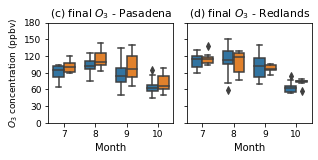

In [56]:
fig, ax=plt.subplots(1,2, figsize=(4.5,2.2), sharey=True)

my_hue_order = ['weekday', 'weekend']
sns.boxplot(x='Month', y='bag2_3hr', hue='Week', hue_order=my_hue_order,
            data=df_chamber_pasadena, ax=ax[0], width=0.7)
sns.boxplot(x='Month', y='bag2_3hr', hue='Week', hue_order=my_hue_order, 
            data=df_chamber_redlands, ax=ax[1], width=0.7)


for i in range(2):
    ax[i].set_xlabel('Month', fontsize=10)
    ax[i].set_ylim(0, 180)
    ax[i].set_box_aspect(4/5)
    ax[i].legend().remove()
    #ax[i].legend(loc='lower left', title='', fontsize=8)
ax[0].set_title('(c) final $O_3$ - Pasadena')
ax[1].set_title('(d) final $O_3$ - Redlands')
ax[1].set_yticks(np.arange(0, 181, 30))
ax[0].set_ylabel('$O_3$ concentration (ppbv)')
ax[1].set_ylabel('')
#ax[0].set_yticks(['Jul','Aug','Sept','Oct'])

plt.tight_layout()
fig.show()
fig.savefig('../../result/Figure1_2.png', dpi=1200, bbox_inches='tight', facecolor='white')
#fig.savefig('../../result/time_series_final_chamber_O3_morning_daily_redlands_pasadena.png', dpi=1200, bbox_inches='tight')

## Initial O3

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_2512/3585369374.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


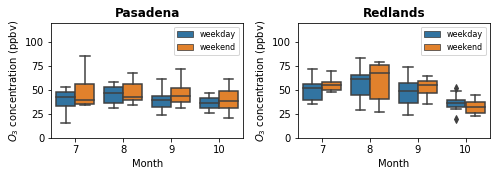

In [28]:
fig, ax=plt.subplots(1,2, figsize=(7,4))

my_hue_order = ['weekday', 'weekend']
sns.boxplot(x='Month', y='O3', hue='Week', hue_order=my_hue_order,
            data=df_ambient_pasadena, ax=ax[0])
sns.boxplot(x='Month', y='O3', hue='Week', hue_order=my_hue_order, 
            data=df_ambient_redlands, ax=ax[1])


for i in range(2):
    ax[i].set_xlabel('Month')
    ax[i].set_ylim(0, 120)
    ax[i].set_ylabel('$O_3$ concentration (ppbv)')
    ax[i].set_box_aspect(3/5)
    ax[i].legend(loc='upper right', title='', fontsize=8)
ax[1].set_title('Redlands', fontweight='bold')
ax[0].set_title('Pasadena', fontweight='bold')

plt.tight_layout()
fig.show()
fig.savefig('../../result/time_series_init_ambient_O3_morning_daily_redlands_pasadena.png', dpi=1200, bbox_inches='tight')

## O3 sensitivity vs. MDA8 O3 (filled by temperature)

In [5]:
# import MDA8 data
MDA8_pasadena = pd.read_csv('../../data/final/MDA8_O3_pasadena.csv')
MDA8_redlands = pd.read_csv('../../data/final/MDA8_O3_redlands.csv')
MDA8_pasadena['Date'] = pd.to_datetime(MDA8_pasadena['Date'],format='%Y-%m-%d')
MDA8_redlands['Date'] = pd.to_datetime(MDA8_redlands['Date'],format='%Y-%m-%d')

# combine MDA8 to chamber O3
df_chamber_MDA8_pasadena = \
    df_chamber_pasadena[['Date','bag2_3hr', 'b1_b2_3hr', 'b3_b2_3hr']].\
        merge(MDA8_pasadena, on='Date', how='left')
df_chamber_MDA8_redlands = \
    df_chamber_redlands[['Date','bag2_3hr', 'b1_b2_3hr', 'b3_b2_3hr']].\
        merge(MDA8_redlands, on='Date', how='left')

# set to bin of MDA8 O3
cut_bins = [0,50,70,90,120]
cut_labels = ['< 50','50~70', '70~90', '> 90']
df_chamber_MDA8_pasadena['MDA8_bin'] = \
    pd.cut(df_chamber_MDA8_pasadena['MDA8'],bins=cut_bins, labels=cut_labels)
df_chamber_MDA8_redlands['MDA8_bin'] = \
    pd.cut(df_chamber_MDA8_redlands['MDA8'],bins=cut_bins, labels=cut_labels)

In [10]:
# merge temperature
temp_avg_bin_pasadena = df_chamber_MDA8_pasadena.merge(df_temp_max_PA, on='Date', how='left').groupby('MDA8_bin').mean()['value']
temp_avg_bin_redlands = df_chamber_MDA8_redlands.merge(df_temp_max_RL, on='Date', how='left').groupby('MDA8_bin').mean()['value']
temp_avg_bin_pasadena = (temp_avg_bin_pasadena-32)*5/9
temp_avg_bin_redlands = (temp_avg_bin_redlands-32)*5/9
#df_chamber_MDA8_pasadena['temp_avg'] = (df_chamber_MDA8_pasadena['temp_avg']-32)*5/9
#df_chamber_MDA8_redlands['temp_avg'] = (df_chamber_MDA8_redlands['temp_avg']-32)*5/9

In [11]:
# set color pallette for the each box based on averaged Max temperature

# get colorbar (normed from 20~40℃)
from matplotlib import cm, colors
norm = colors.Normalize(20, 40)

# get color rgb for each 1℃ from 20~40℃
pal = sns.color_palette("YlOrBr", n_colors=20).as_hex()

# get color for each bin
pal_pasadena = []
for i in range(3):
    color_index = round(temp_avg_bin_pasadena[i]-20, 0)
    color = pal[int(color_index)]
    pal_pasadena.append(color)

pal_redlands = []
for i in range(4):
    color_index = round(temp_avg_bin_redlands[i]-20, 0)
    color = pal[int(color_index)]
    pal_redlands.append(color)

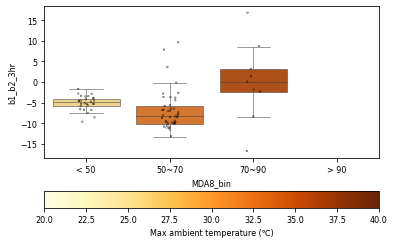

In [131]:
# test plot

df_plot = df_chamber_MDA8_pasadena.dropna()
sns.boxplot(x='MDA8_bin', y='b1_b2_3hr', data=df_plot, 
            palette=pal_pasadena, linewidth=0.5, showfliers = False)
sns.stripplot(x='MDA8_bin', y='b1_b2_3hr', data=df_plot, orient='v', marker = '$\circ$',
              color='none', edgecolor='black', facecolor="none", size=3)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap='YlOrBr'), label='Max ambient temperature (℃)', location='bottom')

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_15804/3216956479.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


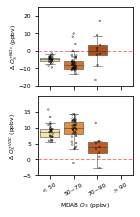

In [134]:
# plot Pasadena
df_plot = df_chamber_MDA8_pasadena.dropna()

plt.rcParams.update({'font.size': 6})

fig, ax=plt.subplots(2,1,figsize=(2,3), sharex=True)


sns.boxplot(x='MDA8_bin', y='b1_b2_3hr', data=df_plot, 
            palette=pal_pasadena, linewidth=0.5, ax=ax[0], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b1_b2_3hr', data=df_plot, orient='v', marker = '$\circ$',
              color='none', edgecolor='black', facecolor="none", ax=ax[0], size=3)

sns.boxplot(x='MDA8_bin', y='b3_b2_3hr', data=df_plot, 
            palette=pal_redlands, linewidth=0.5, ax=ax[1], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b3_b2_3hr', data=df_plot,orient='v', marker = '$\circ$',
              color='none', edgecolor='black', facecolor="none", ax=ax[1], size=3)

for i in range(2):
    ax[i].axhline(y=0, color='r',linestyle='--',linewidth=1, alpha=0.5)
    ax[i].tick_params(axis='x', labelrotation=30)
    ax[i].set_box_aspect(1/1.2)


ax[0].set_ylim(-20,25)
ax[1].set_ylim(-5,20)
ax[0].set_yticks(np.arange(-20,30,10))
ax[1].set_yticks(np.arange(-5,20,5))

ax[0].set_xlabel('')
ax[1].set_xlabel('MDA8 $O_3$ (ppbv)')
ax[0].set_ylabel(r'$\Delta\ O_3^{+NO_x}$ (ppbv)', labelpad=-2)
ax[1].set_ylabel(r'$\Delta\ O_3^{+VOC}$ (ppbv)')

plt.tight_layout()
fig.show()
fig.savefig('../../result/time_series_O3_sensitivity_vs_MDA8_temp_pasadena.png',dpi=1200,bbox_inches='tight', facecolor='white')

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_15804/352490254.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


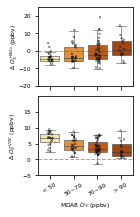

In [135]:
# plot Redlands
df_plot = df_chamber_MDA8_redlands.dropna()
fig, ax=plt.subplots(2,1,figsize=(2.5,3), sharex=True)

sns.boxplot(x='MDA8_bin', y='b1_b2_3hr', data=df_plot, 
            palette=pal_redlands, linewidth=0.5, ax=ax[0], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b1_b2_3hr', data=df_plot, orient='v', marker = '$\circ$',
              color='none', edgecolor='black', facecolor="none", ax=ax[0], size=3)

sns.boxplot(x='MDA8_bin', y='b3_b2_3hr', data=df_plot, 
            palette=pal_redlands, linewidth=0.5, ax=ax[1], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b3_b2_3hr', data=df_plot, orient='v', marker = '$\circ$',
              color='none', edgecolor='black', facecolor="none", ax=ax[1], size=3)

for i in range(2):
    ax[i].axhline(y=0, color='r',linestyle='--',linewidth=1, alpha=0.5)
    ax[i].tick_params(axis='x', labelrotation=30)
    ax[i].set_box_aspect(1/1.2)


ax[0].set_ylim(-20,25)
ax[1].set_ylim(-5,20)
ax[0].set_yticks(np.arange(-20,30,10))
ax[1].set_yticks(np.arange(-5,20,5))

ax[0].set_xlabel('')
ax[1].set_xlabel('MDA8 $O_3$ (ppbv)')
ax[0].set_ylabel(r'$\Delta\ O_3^{+NO_x}$ (ppbv)', labelpad=-2)
ax[1].set_ylabel(r'$\Delta\ O_3^{+VOC}$ (ppbv)')

plt.tight_layout()
fig.show()
fig.savefig('../../result/time_series_O3_sensitivity_vs_MDA8_temo_redlands.png', dpi=1200, bbox_inches='tight', facecolor='white')

In [16]:
df_sarpc_pasadena = pd.read_csv("../../data/intermediate/saprc11_initial_conc_pasadena.csv")
df_pasadena = df_sarpc_pasadena[df_sarpc_pasadena['S11']=='ISOPRENE']

In [24]:
df_redlands = pd.read_csv('../../data/final/CARB_PTR_redlands.csv')
df_redlands = df_redlands[['dates','Isoprene']]

In [13]:
df_chamber_MDA8_pasadena.head()

,Date,bag2_3hr,b1_b2_3hr,b3_b2_3hr,MDA8,Site,Month,Week,MDA8_bin
0,2021-07-16,94.966348,-2.754629,3.811935,62.0,Pasadena,7,Weekday,50~70
1,2021-07-17,91.425291,7.727415,3.129531,68.0,Pasadena,7,Weekend,50~70
2,2021-07-18,119.508034,9.493558,-1.306367,70.0,Pasadena,7,Weekend,50~70
3,2021-07-19,103.200613,-11.624732,8.302386,65.0,Pasadena,7,Weekday,50~70
4,2021-07-23,81.515396,-8.292383,13.746822,57.0,Pasadena,7,Weekday,50~70


## O3 sensitivity vs. MDA8 O3 (due weekday, weekend)

c:\Users\Shenglun\anaconda3\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
c:\Users\Shenglun\anaconda3\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\Shenglun\AppData\Local\Temp/ipykernel_6092/1539655072.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


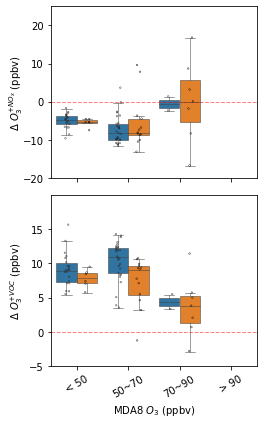

In [37]:
# plot Pasadena
df_plot = df_chamber_MDA8_pasadena.dropna()

plt.rcParams.update({'font.size': 10})

fig, ax=plt.subplots(2,1,figsize=(4,6), sharex=True)


sns.boxplot(x='MDA8_bin', y='b1_b2_3hr',hue='Week',data=df_plot, 
            linewidth=0.5, ax=ax[0], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b1_b2_3hr',hue='Week',data=df_plot, 
              orient='v', marker = '$\circ$', dodge=True,
              color='none', edgecolor='black', facecolor="none", ax=ax[0], size=3)

sns.boxplot(x='MDA8_bin', y='b3_b2_3hr',hue='Week',data=df_plot, 
            linewidth=0.5, ax=ax[1], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b3_b2_3hr',hue='Week',data=df_plot,
              orient='v', marker = '$\circ$', dodge=True,
              color='none', edgecolor='black', facecolor="none", ax=ax[1], size=3)

for i in range(2):
    ax[i].axhline(y=0, color='r',linestyle='--',linewidth=1, alpha=0.5)
    ax[i].tick_params(axis='x', labelrotation=30)
    ax[i].set_box_aspect(1/1.2)


ax[0].set_ylim(-20,25)
ax[1].set_ylim(-5,20)
ax[0].set_yticks(np.arange(-20,30,10))
ax[1].set_yticks(np.arange(-5,20,5))

ax[0].set_xlabel('')
ax[1].set_xlabel('MDA8 $O_3$ (ppbv)')
ax[0].set_ylabel(r'$\Delta\ O_3^{+NO_x}$ (ppbv)', labelpad=-2)
ax[1].set_ylabel(r'$\Delta\ O_3^{+VOC}$ (ppbv)')

ax[0].get_legend().remove()
ax[1].get_legend().remove()

plt.tight_layout()
fig.show()
fig.savefig('../../result/time_series_O3_sensitivity_vs_MDA8_weekday_pasadena.png',dpi=1200,bbox_inches='tight', facecolor='white')

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_6092/1175073171.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


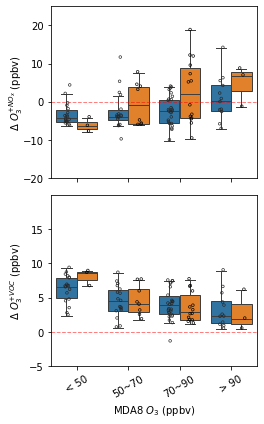

In [35]:
# plot Redlands
df_plot = df_chamber_MDA8_redlands.dropna()
df_plot.sort_values(by='Week', inplace=True)
fig, ax=plt.subplots(2,1,figsize=(4,6), sharex=True)

sns.boxplot(x='MDA8_bin', y='b1_b2_3hr', hue='Week',data=df_plot, 
            linewidth=1, ax=ax[0], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b1_b2_3hr', hue='Week', data=df_plot, 
              orient='v', marker = '$\circ$', dodge=True,
              color='none', edgecolor='black', facecolor="none", ax=ax[0], size=5)

sns.boxplot(x='MDA8_bin', y='b3_b2_3hr', hue='Week', data=df_plot, 
            linewidth=1, ax=ax[1], showfliers = False)
sns.stripplot(x='MDA8_bin', y='b3_b2_3hr', hue='Week', data=df_plot, 
              orient='v', marker = '$\circ$', dodge=True,
              color='none', edgecolor='black', facecolor="none", ax=ax[1], size=5)

for i in range(2):
    ax[i].axhline(y=0, color='r',linestyle='--',linewidth=1, alpha=0.5)
    ax[i].tick_params(axis='x', labelrotation=30)
    ax[i].set_box_aspect(1/1.2)


ax[0].set_ylim(-20,25)
ax[1].set_ylim(-5,20)
ax[0].set_yticks(np.arange(-20,30,10))
ax[1].set_yticks(np.arange(-5,20,5))

ax[0].set_xlabel('')
ax[1].set_xlabel('MDA8 $O_3$ (ppbv)')
ax[0].set_ylabel(r'$\Delta\ O_3^{+NO_x}$ (ppbv)', labelpad=-2)
ax[1].set_ylabel(r'$\Delta\ O_3^{+VOC}$ (ppbv)')

ax[0].get_legend().remove()
ax[1].get_legend().remove()

plt.tight_layout()
fig.show()
fig.savefig('../../result/time_series_O3_sensitivity_vs_MDA8_weekday_redlands.png', dpi=1200, bbox_inches='tight', facecolor='white')

In [28]:
ax[0].legend()